


In this notebook we are going to predict the **Headlength of Possum**. There are 14 variables in the dataset which are given below:
1. Case
2. Site
3. chest
4. Footlength
5. Skullwidth
6. Belly
7. Age
8. Footlength
9. Totallength
10. Eye
11. Earconch
12. Tail
13. Sex
14. Population

# Import all the Libraries

In [361]:
# import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor



# Read the Dataset

In [362]:
# Read the dataset
data= pd.read_csv("./possum.csv")
data.head(5)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [364]:
# lets check the shape of dataset
data.shape

(104, 14)

In [365]:
# lets check Is there any null values in the dataset
data.isna().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [366]:
# Let drop the case column because it is just show the Id
data.drop(["case"], inplace=True, axis=1)

In [367]:
# Lets check the stat of data
data.describe()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [368]:
data.isnull().sum()/len(data)

site        0.000000
Pop         0.000000
sex         0.000000
age         0.019231
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.009615
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

# Getting Categorical and Numerical Columns

In [369]:
# Getting Categorical and numerical columns
categorical_columns=data.select_dtypes(include="object").columns
numerical_columns=data.select_dtypes(exclude="object").columns

In [370]:
print(f"categorical_columns: {categorical_columns}")
print(f"numerical_columns: {numerical_columns}")

categorical_columns: Index(['Pop', 'sex'], dtype='object')
numerical_columns: Index(['site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth',
       'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


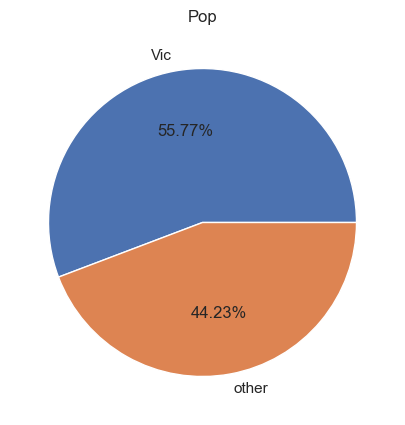

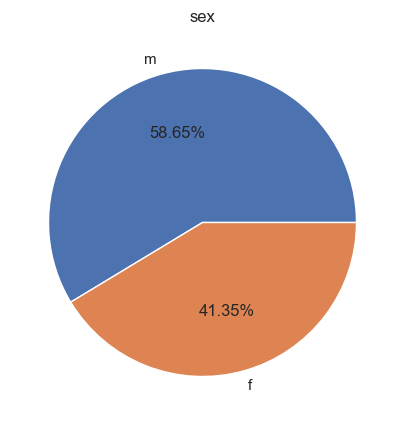

In [371]:
# pie chart for categorical columns
for i in categorical_columns:
    plt.figure(figsize=(10,5))
    plt.pie(data[i].value_counts(),labels=data[i].unique(),autopct="%0.2f%%")
    plt.title(i)
    plt.show()

In [372]:
data.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



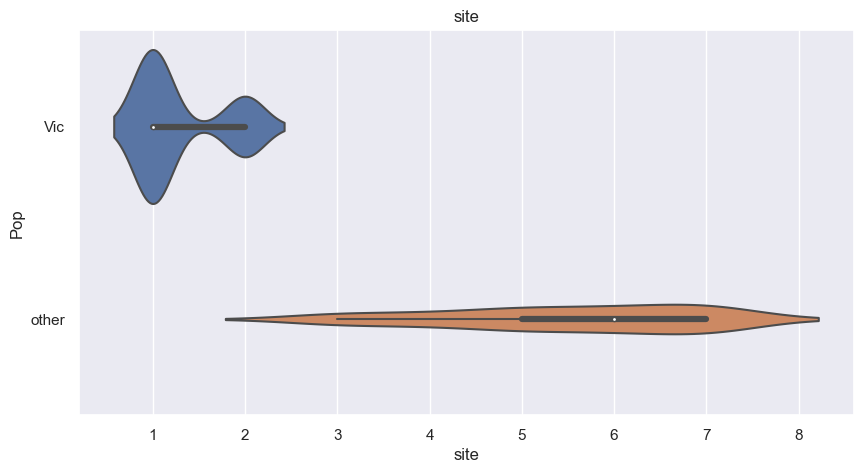

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



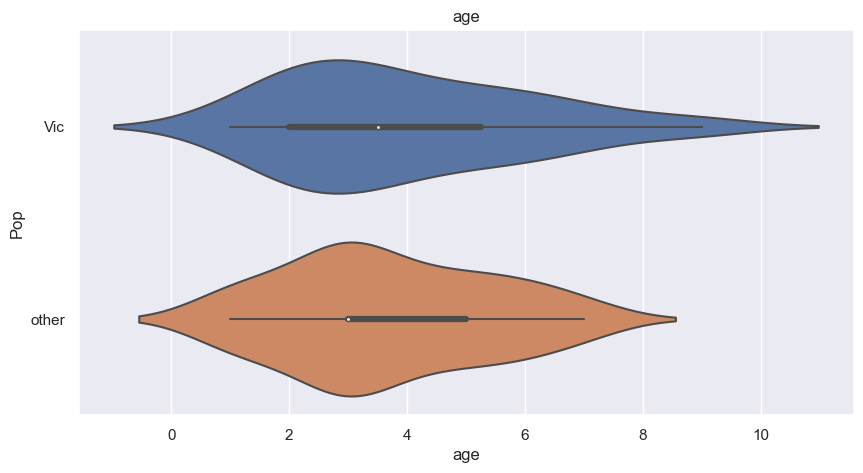

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



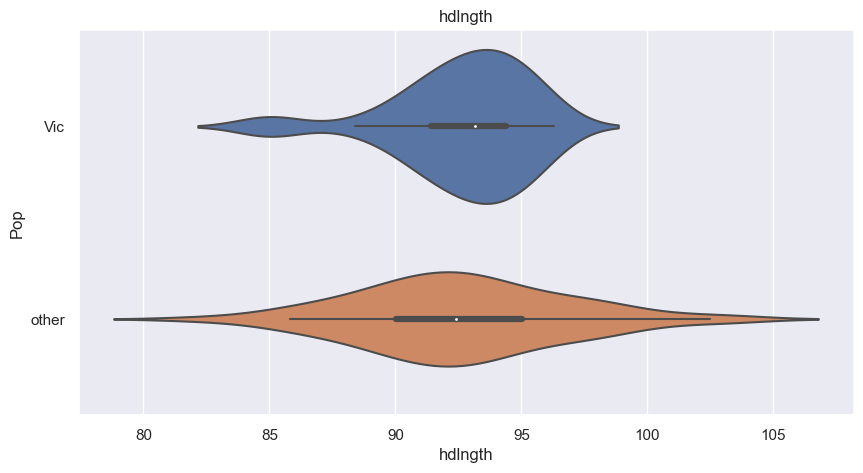

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



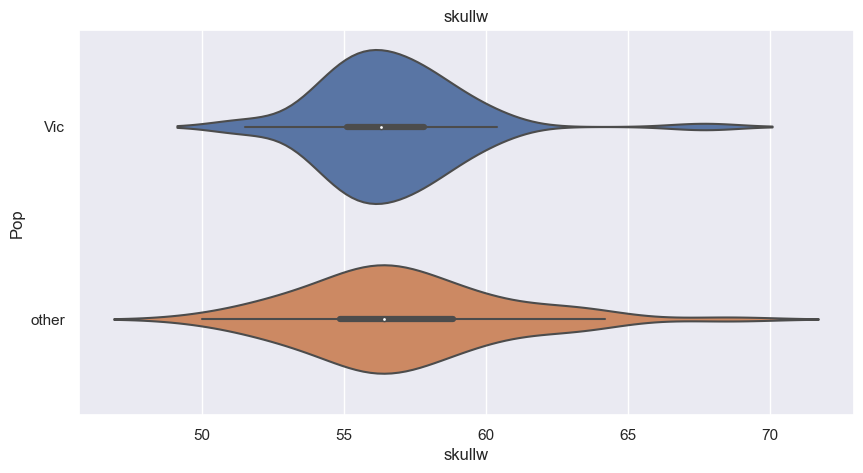

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



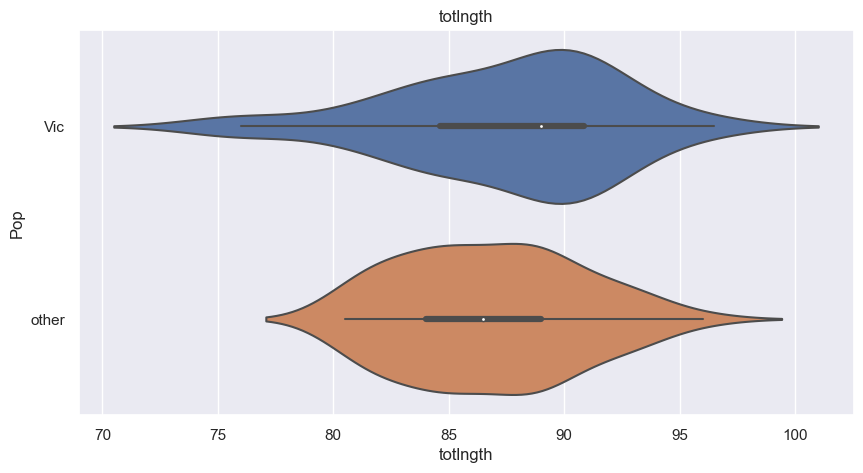

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



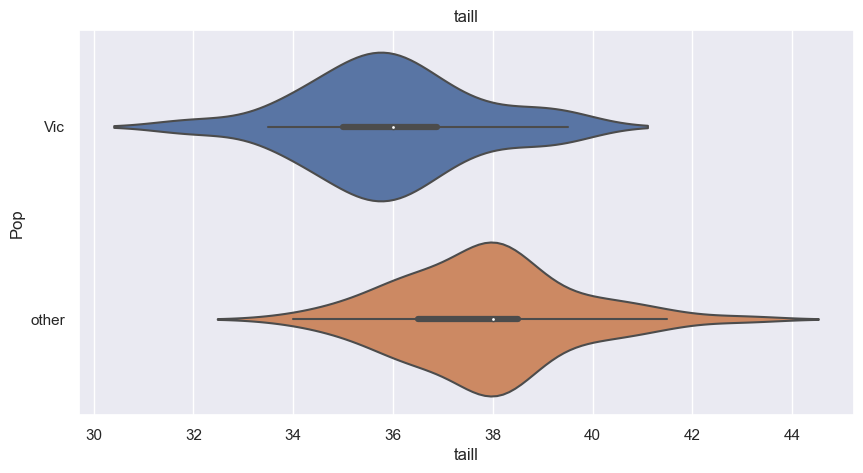

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



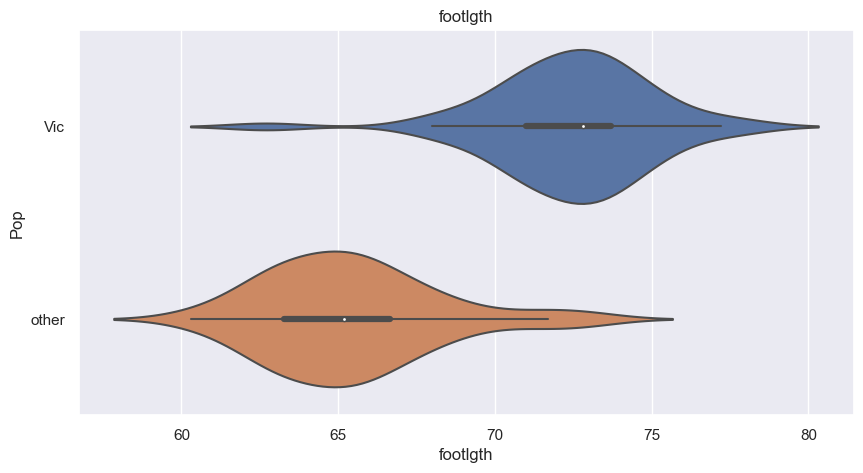

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



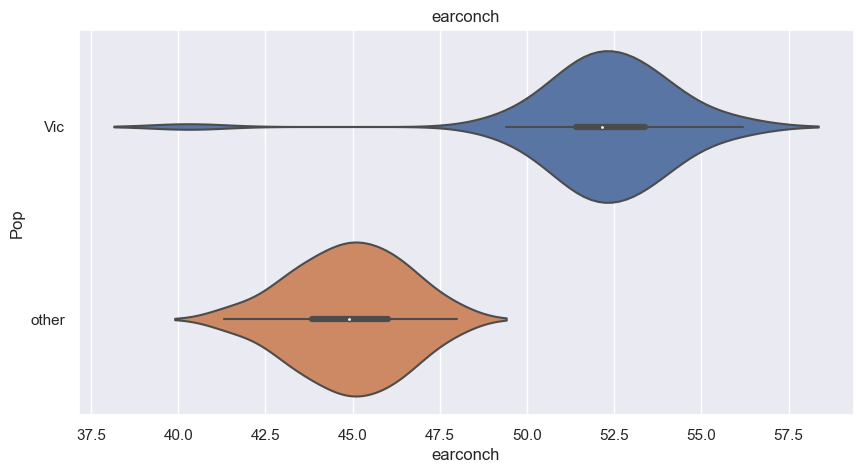

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



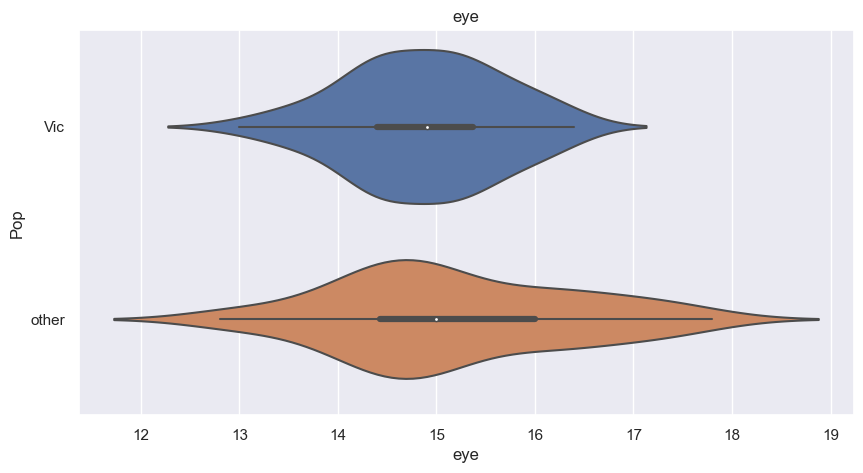

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



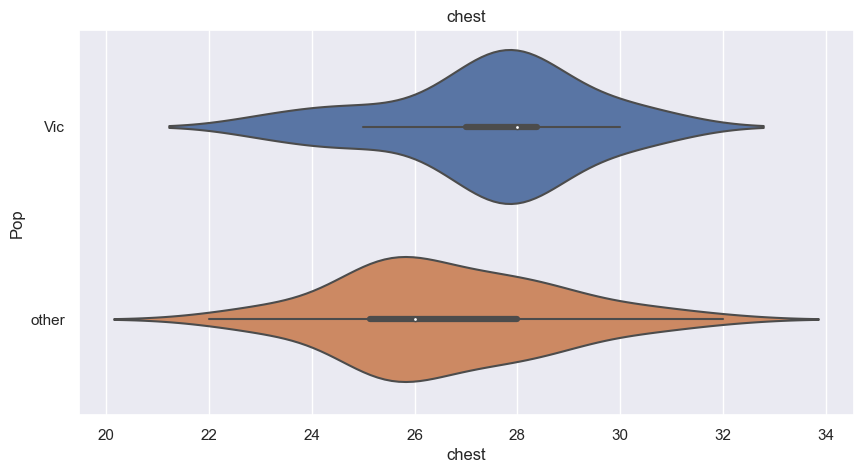

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



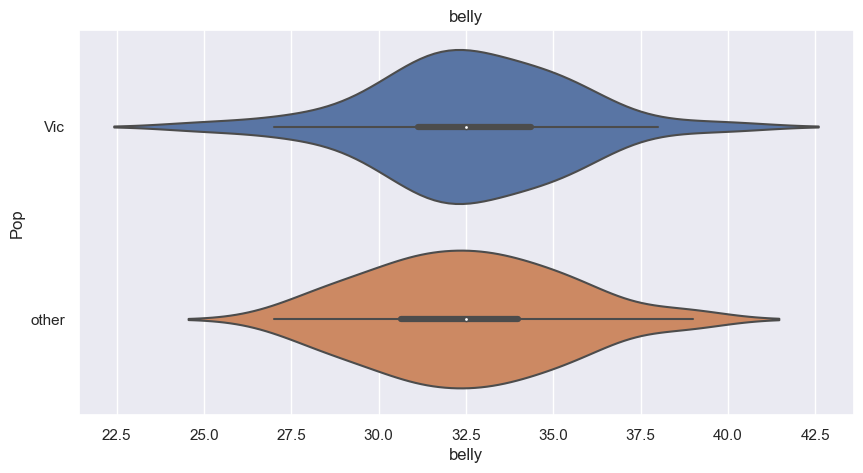

In [373]:
# violin plot for numerical columns with target variable
for i in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.violinplot(x=data[i],y=data["Pop"],data=data)
    plt.title(i)
    plt.show()


# Exploratory Data Analysis

In [374]:
df=data.drop(["Pop","sex"],axis=1)
df.corr().style.background_gradient(cmap='coolwarm')

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716
chest,-0.345494,0.334209,0.631498,0.629737,0.577890,0.174997,0.450590,0.199230,0.149338,1.000000,0.606170


# Univariate Analysis

# Lets see the Distribution Of Numerical Columns

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



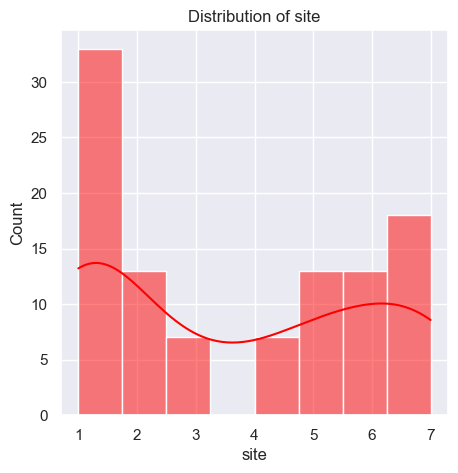

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



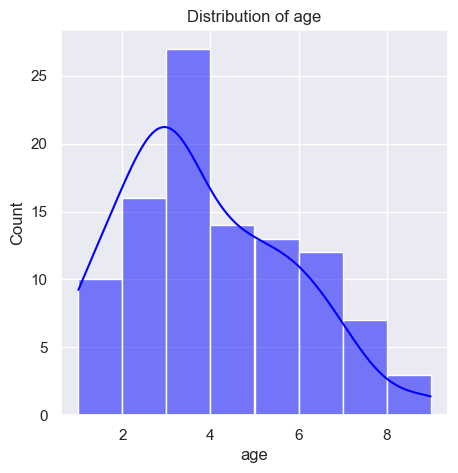

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



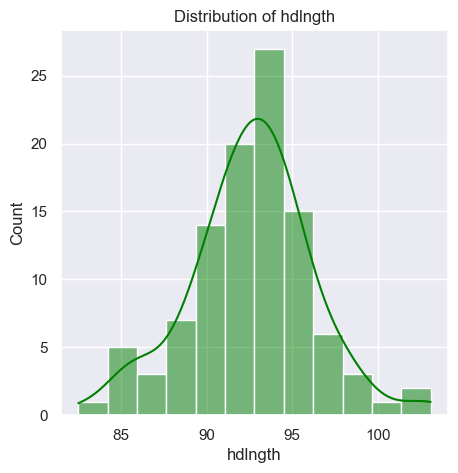

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



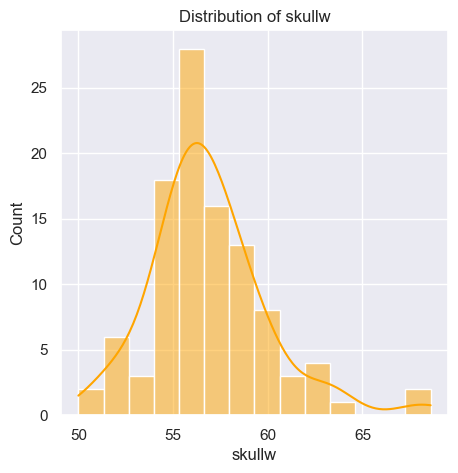

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



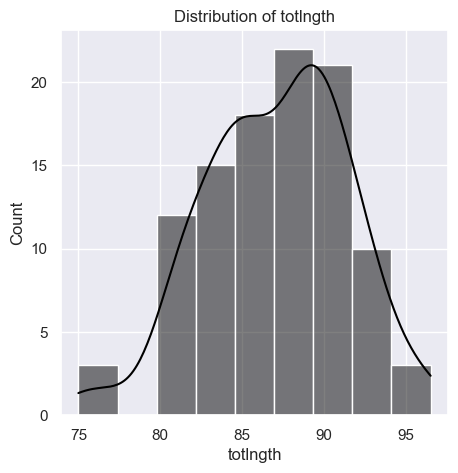

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



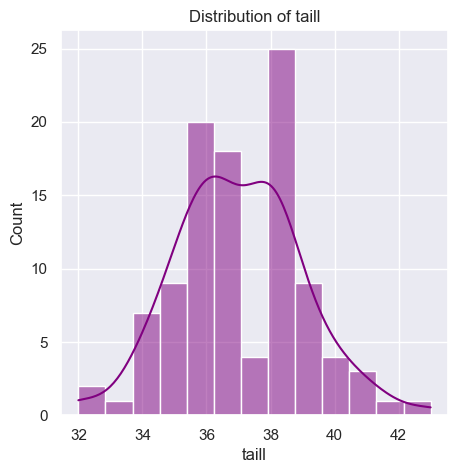

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



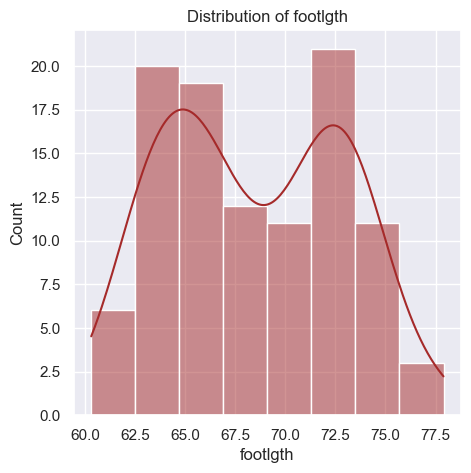

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



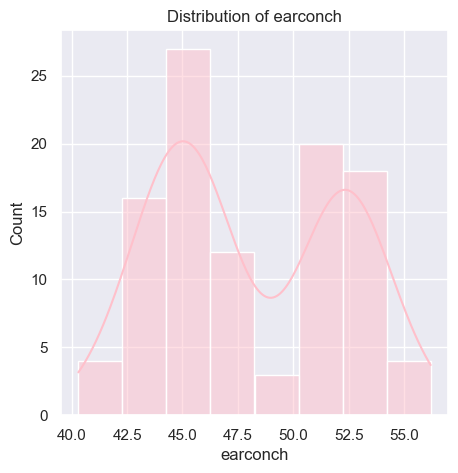

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



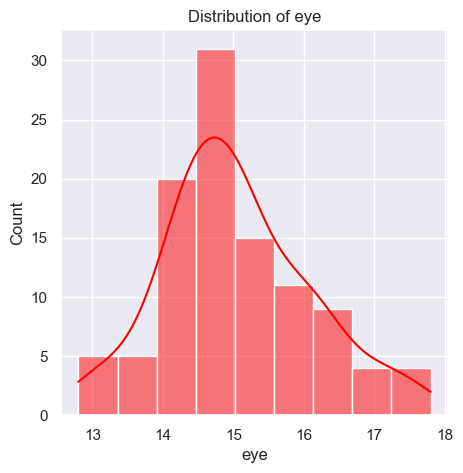

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



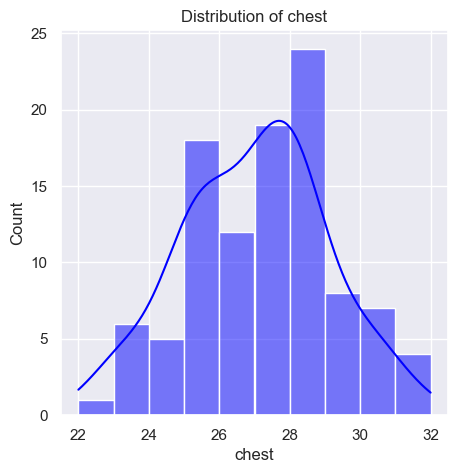

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



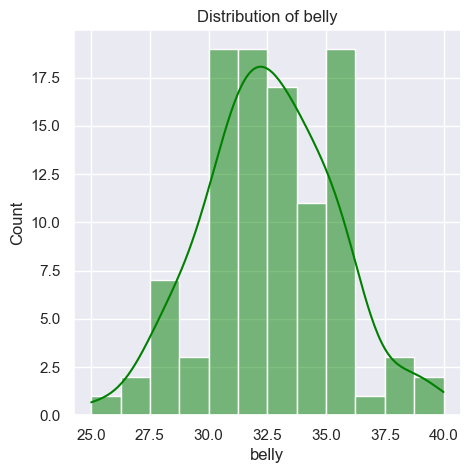

In [375]:
colors=["red","blue", "green","orange","black","purple", "brown","pink","red","blue", "green"]

for i in range(11):
    plt.figure(figsize=(5,5))
    sns.set(style="darkgrid")
    sns.histplot(data, x=data[numerical_columns[i]], kde=True, color=colors[i])
    plt.title(f"Distribution of {numerical_columns[i]}")
    plt.show()

# Categorical Columns

In [376]:
data["Pop"].unique()

array(['Vic', 'other'], dtype=object)

> The Population either belongs to Vic (Victoria) or other (New South Wales or Queensland).

In [377]:
data["sex"].unique()

array(['m', 'f'], dtype=object)

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



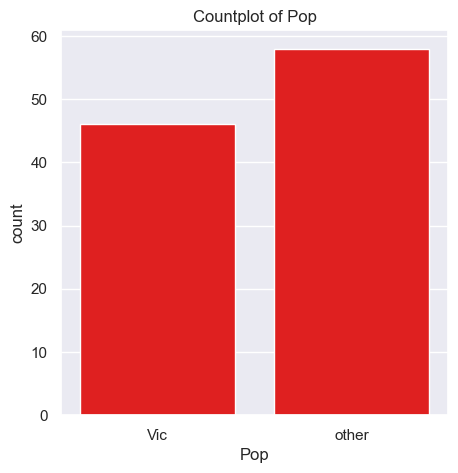

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



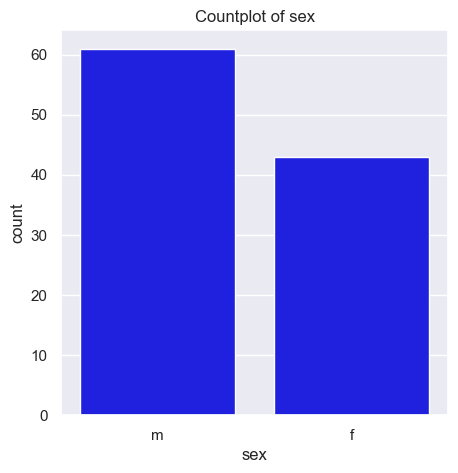

In [378]:
colors=["red","blue"]
for i in range(2):
    plt.figure(figsize=(5,5))
    sns.countplot(data, x=data[categorical_columns[i]],color=colors[i])
    plt.title(f"Countplot of {categorical_columns[i]}")
    plt.show()
    

# Bivariate Analysis

In [379]:
fig = px.scatter(data, x="hdlngth", y="age", color="age",trendline="ols", title="Headlength vs Age")
fig.show()

In [380]:
fig = px.scatter(data, x="hdlngth", y="skullw", size="skullw",color="skullw",trendline="ols", title="Headlength vs Skullwidth")
fig.show()

In [381]:
fig = px.scatter(data, x="footlgth", y="earconch", color="earconch", trendline="ols",title="Footlength vs Earconch")
fig.show()

In [382]:
fig = px.scatter(data, x="hdlngth", y="chest", color="chest", trendline="ols", title="Headlength vs Chest")
fig.show()

In [383]:
fig = px.scatter(data, x="belly", y="chest", color="chest", trendline="ols", title="Belly vs Chest")
fig.show()

In [384]:
fig = px.scatter(data, x="skullw", y="chest", color="chest", trendline="ols", title="Skullwidth vs Chest")
fig.show()

> # In Bivariate Analysis, we notice the Positive Correlation between above variables that we can also observe from the Correlation Matrix.

In [385]:
fig = px.box(data, x="sex", y="hdlngth", points="all", color="sex", title="Headlength vs Sex")
fig.show()


> # Here we see that the Male Possusum has a Bigger Head as compare to Female Possum.

In [386]:
fig = px.box(data, x="Pop", y="hdlngth", points="all", color="sex", title="Headlength vs Population")
fig.show()


> # Here we observe that more no. of Male and Female Possum Belongs to other (New South Wales or Queensland) category than Victoria.

# Handling Missing Values in the Dataset

In [387]:
data["age"]= data["age"].fillna(data["age"].median())
data["footlgth"]= data["footlgth"].fillna(data["footlgth"].median())

# Divide Dataset into Train and Test Set

In [388]:
from sklearn.model_selection import train_test_split

train_data,test_data=train_test_split(data,test_size=0.3,random_state=2)


In [389]:
train_data.shape

(72, 13)

In [390]:
test_data.shape

(32, 13)

# Outliers in the Dataset

In [392]:
# data['hdlngth'].plot(kind='box')

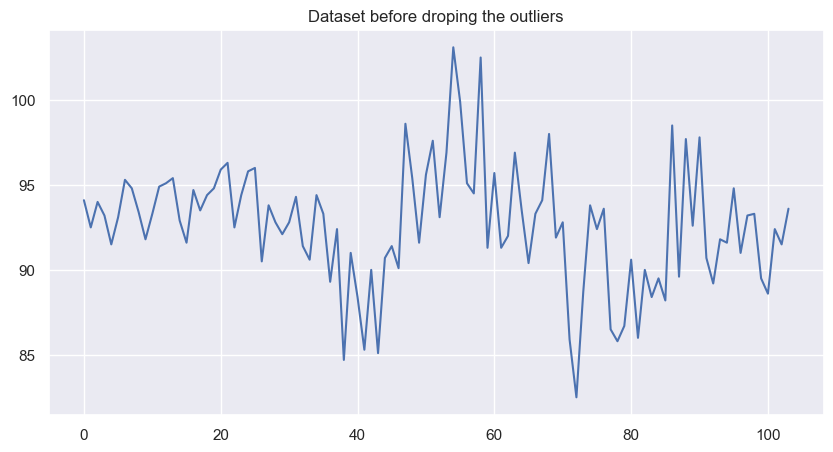

In [393]:
# plot dataset before droping the outliers
plt.figure(figsize=(10,5))
plt.plot(data["hdlngth"])
plt.title("Dataset before droping the outliers")
plt.show()


<Axes: >

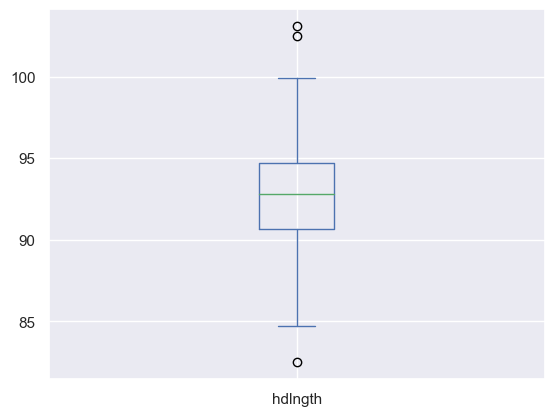

In [394]:
data['hdlngth'].plot(kind='box')


In [395]:
before_outlier_removal=data['hdlngth'].describe()

In [396]:
def Percentile_Method(columns, data, a, b):
    
    outliers=[]

    for col in columns:
        q1= np.percentile(data[col], a)
        q2= np.percentile(data[col],b)
        
        for pos in range(len(data)):
            if data[col].iloc[pos]>q2 or data[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(data)*100, 2)                       # Ratio of outliers
    data.drop(data.index[outliers], inplace=True)    # remove the outliers from the dataset
    
    
    return ratio, data

In [397]:
ratio,train_data= Percentile_Method(numerical_columns,train_data, a=0.3, b=99.8)
print(f"Ratio of Detected Outliers:{ratio}")

Ratio of Detected Outliers:18.06


<Axes: >

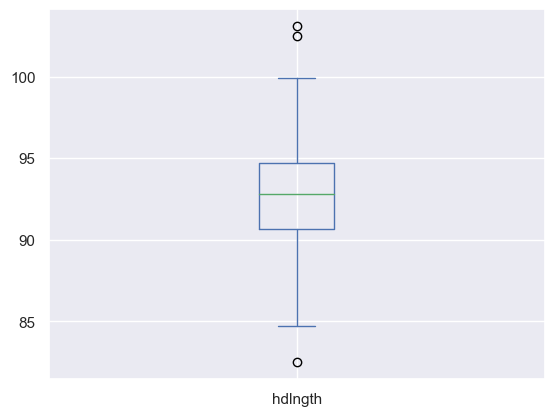

In [398]:
data['hdlngth'].plot(kind='box')

In [399]:
after_outlier_removal=data['hdlngth'].describe()


In [400]:
pd.concat([before_outlier_removal,after_outlier_removal],axis=1,keys=["Before Outlier Removal","After Outlier Removal"])

,Before Outlier Removal,After Outlier Removal
count,104.000000,104.000000
mean,92.602885,92.602885
std,3.573349,3.573349
min,82.500000,82.500000
25%,90.675000,90.675000
50%,92.800000,92.800000
75%,94.725000,94.725000
max,103.100000,103.100000


In [401]:
train_data.shape

(59, 13)

# Data Preprocessing

In [402]:
x_train=train_data.drop("hdlngth", axis=1)
y_train=train_data["hdlngth"]

x_test=test_data.drop("hdlngth", axis=1)
y_test=test_data["hdlngth"]

In [403]:
x_train.shape, y_train.shape,  x_test.shape, y_test.shape

((59, 12), (59,), (32, 12), (32,))

 # Label Encoding

In [404]:
# Label Encoding
le= LabelEncoder()
for col in categorical_columns:
    x_train[col]= le.fit_transform(x_train[col])
    x_test[col]=le.transform(x_test[col])

In [405]:
# data after label encoding
x_train


,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
18,1,0,0,5.0,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0
48,3,1,1,4.0,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
36,2,0,0,2.0,54.8,82.5,35.0,71.2,52.0,13.6,28.0,31.5
6,1,0,1,2.0,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
87,7,1,0,2.0,58.0,87.5,38.0,66.7,43.5,16.0,25.5,31.5
71,5,1,1,1.0,52.4,80.5,35.0,62.0,42.4,14.1,25.5,30.0
95,7,1,1,4.0,55.7,83.0,38.0,66.5,47.7,14.0,25.0,33.0
103,7,1,0,3.0,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5
10,1,0,0,9.0,57.2,89.5,39.0,77.2,51.3,14.9,31.0,34.0
12,1,0,1,5.0,59.9,89.5,36.0,71.0,49.8,15.8,27.0,32.0


# Normalization

In [406]:
x_train.head()

,site,Pop,sex,age,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
18,1,0,0,5.0,55.4,90.5,35.0,73.4,53.9,15.2,28.0,32.0
48,3,1,1,4.0,59.2,85.0,37.0,69.0,45.0,15.9,29.5,35.5
36,2,0,0,2.0,54.8,82.5,35.0,71.2,52.0,13.6,28.0,31.5
6,1,0,1,2.0,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
87,7,1,0,2.0,58.0,87.5,38.0,66.7,43.5,16.0,25.5,31.5


In [407]:
# Lets normalize the data into common scale
numerical_columns = ['site', 'age', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

std= StandardScaler()
x_train[numerical_columns]= std.fit_transform(x_train[numerical_columns])
x_test[numerical_columns]= std.transform(x_test[numerical_columns])

# Modelling

In [408]:
rmse = []
r2 = []
y_preds = []

for i in range(len(models)):
    model = GridSearchCV(models[i], parameters[i], cv=5, scoring="r2", n_jobs=-1)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_preds.append(y_pred)
    print(model.best_estimator_)
    print("---------------------------------------------------------------")
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))


RandomForestRegressor(max_depth=10, min_samples_split=4, n_jobs=-1)
---------------------------------------------------------------
GradientBoostingRegressor(learning_rate=0.01, max_features='sqrt',
                          min_samples_leaf=10, min_samples_split=8,
                          n_estimators=500)
---------------------------------------------------------------


c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



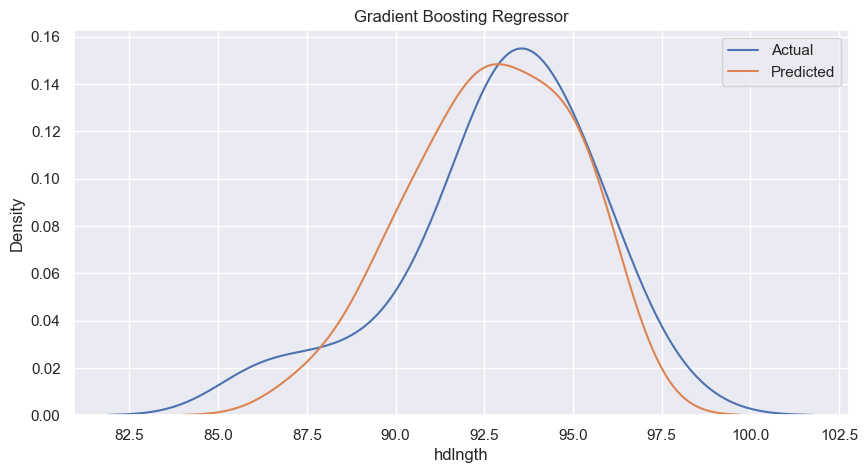

In [409]:
#plot density for actual and predicted y_test and y_preds
plt.figure(figsize=(10,5))
sns.kdeplot(y_test, label="Actual")
sns.kdeplot(y_preds[0], label="Predicted")
plt.legend()
plt.title("Gradient Boosting Regressor")
plt.show()




c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



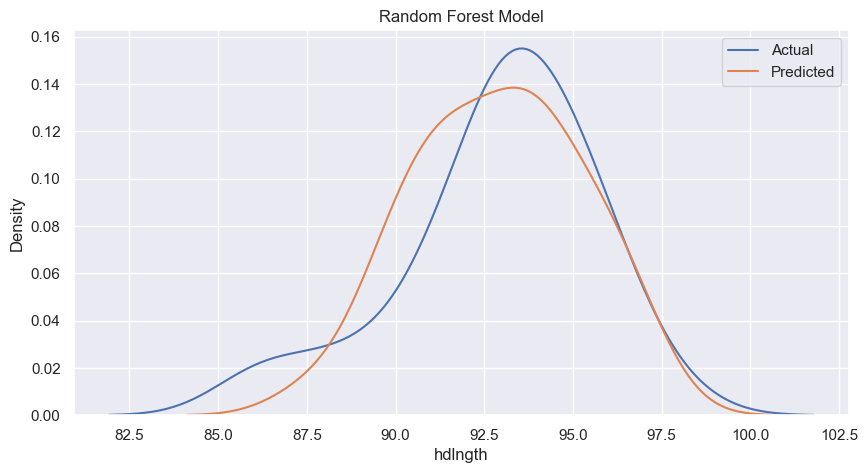

In [410]:
# plot random forest model
plt.figure(figsize=(10,5))
sns.kdeplot(y_test, label="Actual")
sns.kdeplot(y_preds[1], label="Predicted")
plt.legend()
plt.title("Random Forest Model")
plt.show()


# plt.figure(figsize=(10,5))
# sns.kdeplot(y_test, label="Actual")
# sns.kdeplot(y_preds, label="Predicted")
# plt.legend()
# plt.title("Gradient Boosting Regressor")
# plt.show()

# Results

In [411]:
model_names = ['RandomForest','GradientBoost']
result_df = pd.DataFrame({'RMSE':rmse,'R2_score': r2}, index=model_names)
result_df

,RMSE,R2_score
RandomForest,1.804692,0.545416
GradientBoost,1.907504,0.492146


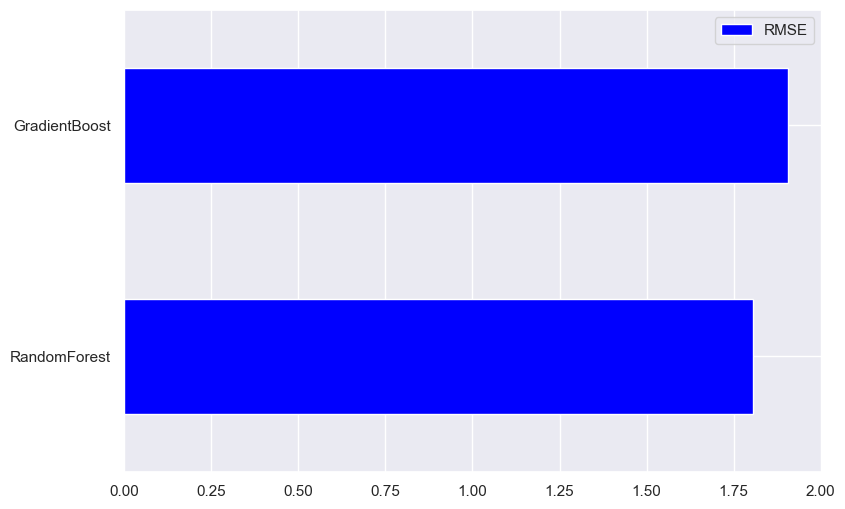

In [412]:
result_df["RMSE"].plot(kind="barh", figsize=(9, 6), color="blue").legend(bbox_to_anchor=(1.0, 1.0))

Linear Regression

In [413]:
data.head(5)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


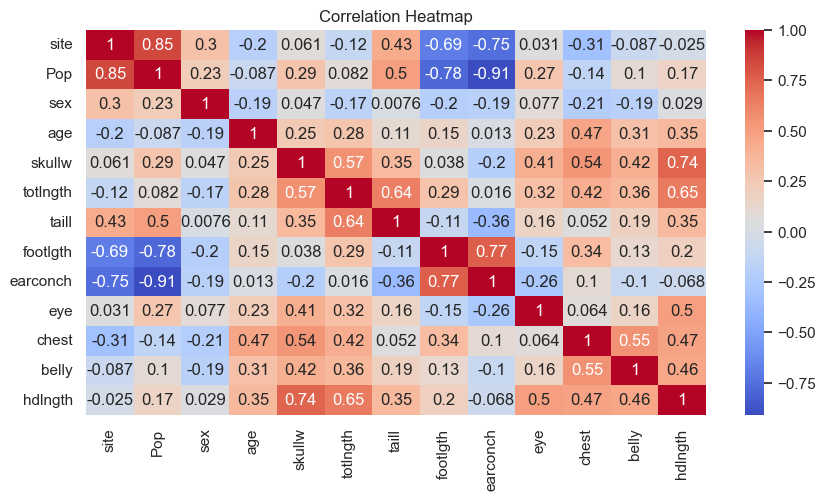

In [414]:
corr=pd.concat([x_train,y_train],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

# create heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [415]:
# Variance Inflation Factor - measures multicollinearity
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each column
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Use the function to calculate VIF for your DataFrame
vif_results = calculate_vif(x_train)

# Display the results
print(vif_results)


    Variable       VIF
0       site  3.892693
1        Pop  4.000090
2        sex  2.744340
3        age  1.406497
4     skullw  2.331033
5   totlngth  3.688408
6      taill  3.317951
7   footlgth  3.587574
8   earconch  4.426186
9        eye  1.576049
10     chest  2.681148
11     belly  1.604329


In [416]:
# linear regression 
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()
lr_model.fit(x_train,y_train)
y_preds=lr_model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_preds)))
print("R2_score:",r2_score(y_test, y_preds))


RMSE: 1.9572963782175083
R2_score: 0.46528636336210116


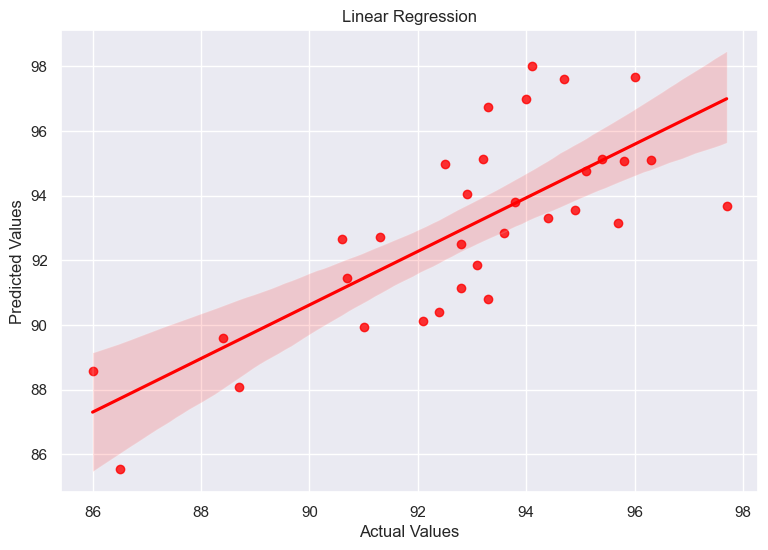

In [417]:
# plot the linear regression
plt.figure(figsize=(9,6))
# sns.regplot(y_test, y_preds, color="blue")
sns.regplot(x=y_test, y=y_preds, color="red")
plt.title("Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


Decision tree

RMSE: 2.671025084120326
R2_score: 0.004218604112287694


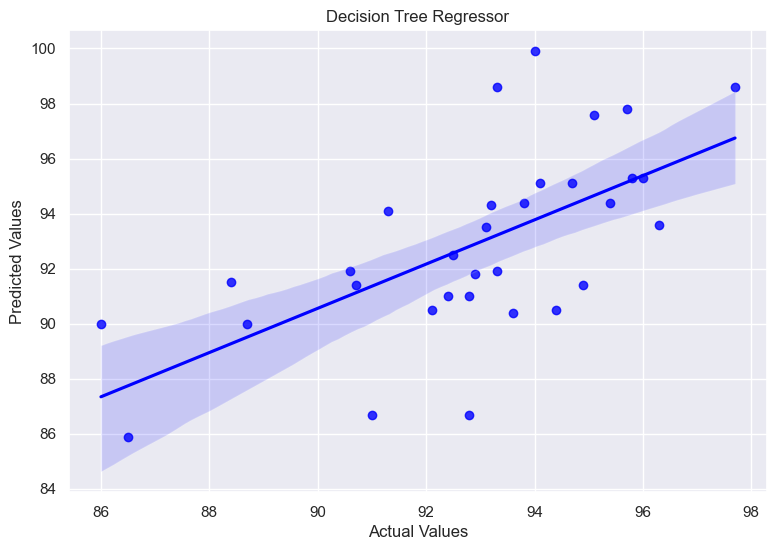

In [418]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
y_preds=dt_model.predict(x_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_preds)))
print("R2_score:",r2_score(y_test, y_preds))

# plot the decision tree regressor
plt.figure(figsize=(9,6))
sns.regplot(x=y_test, y=y_preds, color="blue")
plt.title("Decision Tree Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


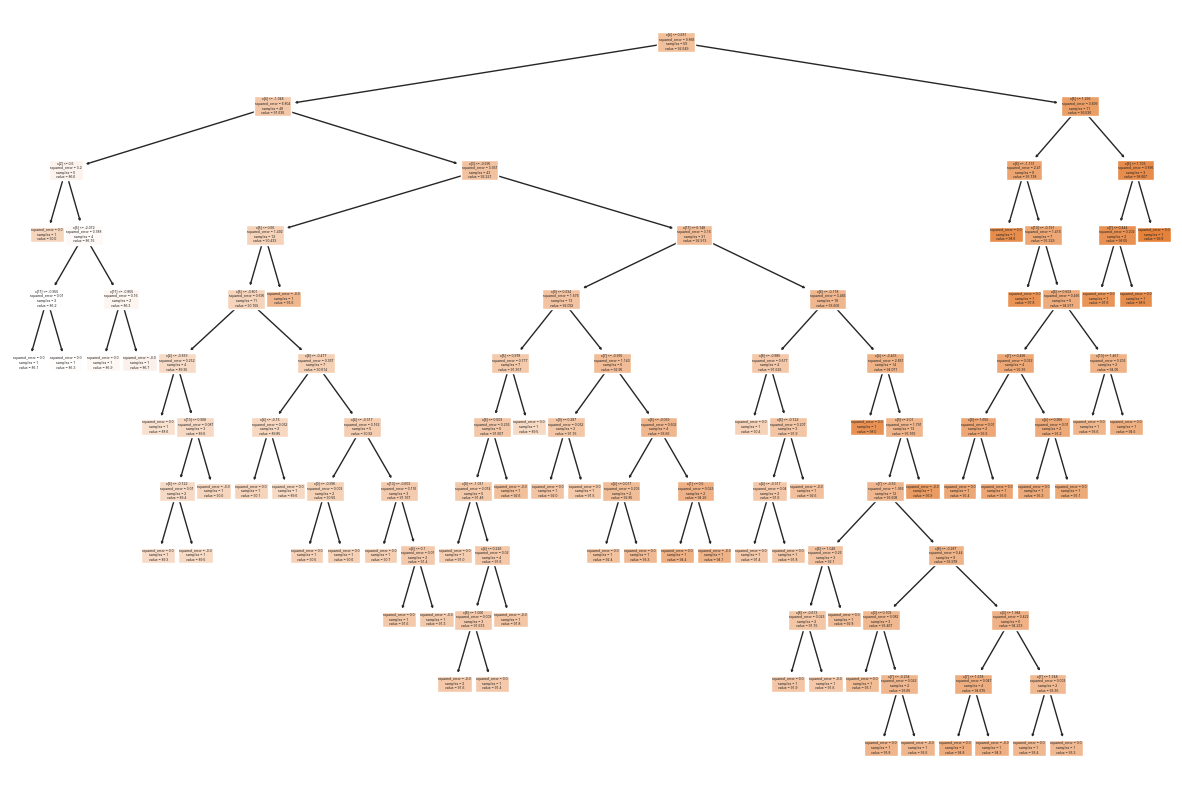

In [419]:
# plot tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True)
plt.show()
